In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv('/Users/loanbeze/Downloads/BUSS6002_Assignment_Pack/analysis/shitrentals.csv')
df_copy=df.copy()
df.head()

,review_id,date,score,lessor,agency_name,property_type,weekly_price,n_bedrooms,suburb,review_text
0,1,2023-11-24 04:08:00,5,Agency,McGrath Estate Agents,Flat/Unit,400,2,Redfern,Living in this apartment was quite the ordeal....
1,2,2023-08-02 13:33:00,4,Agency,Ray White Group,Flat/Unit,300,2,Camperdown,Lease violations were a significant issue in t...
2,3,2023-08-03 02:08:00,3,Agency,Harcourts,Flat/Unit,290,2,Camperdown,Communication with the landlord was a nightmar...
3,4,2023-01-13 11:21:00,5,Agency,Harcourts,Flat/Unit,395,2,Redfern,"The property condition was disappointing, to s..."
4,5,2023-12-30 11:07:00,5,Agency,Century 21 Australia,Flat/Unit,395,2,Redfern,Pest problems and lease violations plagued my ...


In [2]:
#suburb dummmy
suburb_dummy = pd.get_dummies(df['suburb'], drop_first=True).astype(int)
df = pd.concat([df, suburb_dummy], axis=1)
df
#lessor dummy 
lessor_dummy = pd.get_dummies(df['lessor'], drop_first=True).astype(int)
df = pd.concat([df, lessor_dummy], axis=1)
df
#agency_name dummy 
agency_name_dummy = pd.get_dummies(df['agency_name'], drop_first=True).astype(int)
df = pd.concat([df, agency_name_dummy], axis=1)
df.head(1)

,review_id,date,score,lessor,agency_name,property_type,weekly_price,n_bedrooms,suburb,review_text,...,Private,Century 21 Australia,First National Real Estate,Harcourts,LJ Hooker,McGrath Estate Agents,Professionals Real Estate Group,RE/MAX Australia,Raine & Horne,Ray White Group
0,1,2023-11-24 04:08:00,5,Agency,McGrath Estate Agents,Flat/Unit,400,2,Redfern,Living in this apartment was quite the ordeal....,...,0,0,0,0,0,1,0,0,0,0


In [3]:
df.dtypes

review_id                           int64
date                               object
score                               int64
lessor                             object
agency_name                        object
property_type                      object
weekly_price                        int64
n_bedrooms                          int64
suburb                             object
review_text                        object
Newtown                             int64
Redfern                             int64
Private                             int64
Century 21 Australia                int64
First National Real Estate          int64
Harcourts                           int64
LJ Hooker                           int64
McGrath Estate Agents               int64
Professionals Real Estate Group     int64
RE/MAX Australia                    int64
Raine & Horne                       int64
Ray White Group                     int64
dtype: object

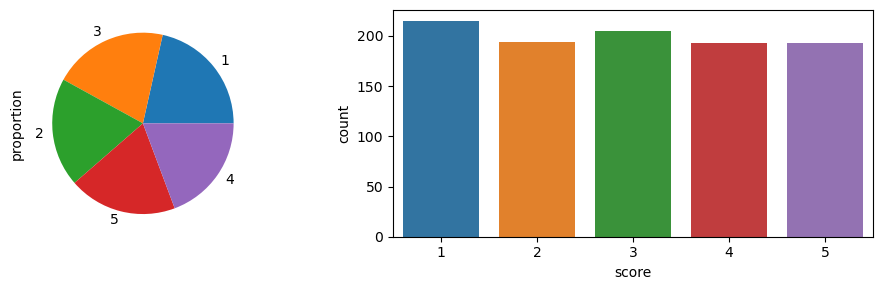

In [4]:
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= df["score"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=df["score"])
plt.tight_layout()
plt.show()

In [5]:
df['score'].value_counts()

score
1    215
3    205
2    194
5    193
4    193
Name: count, dtype: int64

# Data Cleaning

In [6]:
df.isnull().sum()

review_id                            0
date                                 0
score                                0
lessor                               0
agency_name                        203
property_type                        0
weekly_price                         0
n_bedrooms                           0
suburb                               0
review_text                          0
Newtown                              0
Redfern                              0
Private                              0
Century 21 Australia                 0
First National Real Estate           0
Harcourts                            0
LJ Hooker                            0
McGrath Estate Agents                0
Professionals Real Estate Group      0
RE/MAX Australia                     0
Raine & Horne                        0
Ray White Group                      0
dtype: int64

In [7]:
df.count()

review_id                          1000
date                               1000
score                              1000
lessor                             1000
agency_name                         797
property_type                      1000
weekly_price                       1000
n_bedrooms                         1000
suburb                             1000
review_text                        1000
Newtown                            1000
Redfern                            1000
Private                            1000
Century 21 Australia               1000
First National Real Estate         1000
Harcourts                          1000
LJ Hooker                          1000
McGrath Estate Agents              1000
Professionals Real Estate Group    1000
RE/MAX Australia                   1000
Raine & Horne                      1000
Ray White Group                    1000
dtype: int64

In [8]:
#fill up n/a 
df.fillna('Missing_name').tail()

,review_id,date,score,lessor,agency_name,property_type,weekly_price,n_bedrooms,suburb,review_text,...,Private,Century 21 Australia,First National Real Estate,Harcourts,LJ Hooker,McGrath Estate Agents,Professionals Real Estate Group,RE/MAX Australia,Raine & Horne,Ray White Group
995,996,2023-09-28 13:49:00,5,Agency,Raine & Horne,Flat/Unit,415,2,Redfern,Maintenance issues and poor property condition...,...,0,0,0,0,0,0,0,0,1,0
996,997,2023-06-04 12:28:00,4,Agency,LJ Hooker,Flat/Unit,310,2,Camperdown,The property condition of the apartment I rent...,...,0,0,0,0,1,0,0,0,0,0
997,998,2023-10-21 17:31:00,2,Private,Missing_name,Flat/Unit,230,2,Newtown,The property condition of the apartment I rent...,...,1,0,0,0,0,0,0,0,0,0
998,999,2023-09-19 15:34:00,2,Agency,LJ Hooker,Flat/Unit,240,2,Newtown,Maintenance issues and lease violations were b...,...,0,0,0,0,1,0,0,0,0,0
999,1000,2023-12-10 04:38:00,3,Agency,Century 21 Australia,Flat/Unit,245,2,Newtown,Pest problems and a poor property condition we...,...,0,1,0,0,0,0,0,0,0,0


In [9]:
#Check outliers 
df.describe()

,review_id,score,weekly_price,n_bedrooms,Newtown,Redfern,Private,Century 21 Australia,First National Real Estate,Harcourts,LJ Hooker,McGrath Estate Agents,Professionals Real Estate Group,RE/MAX Australia,Raine & Horne,Ray White Group
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,2.955000,267.215000,1.504000,0.329000,0.332000,0.203000,0.086000,0.075000,0.091000,0.076000,0.082000,0.074000,0.08300,0.079000,0.077000
std,288.819436,1.420913,81.005127,0.500234,0.470085,0.471167,0.402434,0.280504,0.263523,0.287753,0.265131,0.274502,0.261902,0.27602,0.269874,0.266725
min,1.000000,1.000000,110.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,250.750000,2.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,500.500000,3.000000,280.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,750.250000,4.000000,305.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1000.000000,5.000000,425.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
df.isnull().sum()

review_id                            0
date                                 0
score                                0
lessor                               0
agency_name                        203
property_type                        0
weekly_price                         0
n_bedrooms                           0
suburb                               0
review_text                          0
Newtown                              0
Redfern                              0
Private                              0
Century 21 Australia                 0
First National Real Estate           0
Harcourts                            0
LJ Hooker                            0
McGrath Estate Agents                0
Professionals Real Estate Group      0
RE/MAX Australia                     0
Raine & Horne                        0
Ray White Group                      0
dtype: int64

# EDA

/Users/loanbeze/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/loanbeze/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/loanbeze/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/loanbeze/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

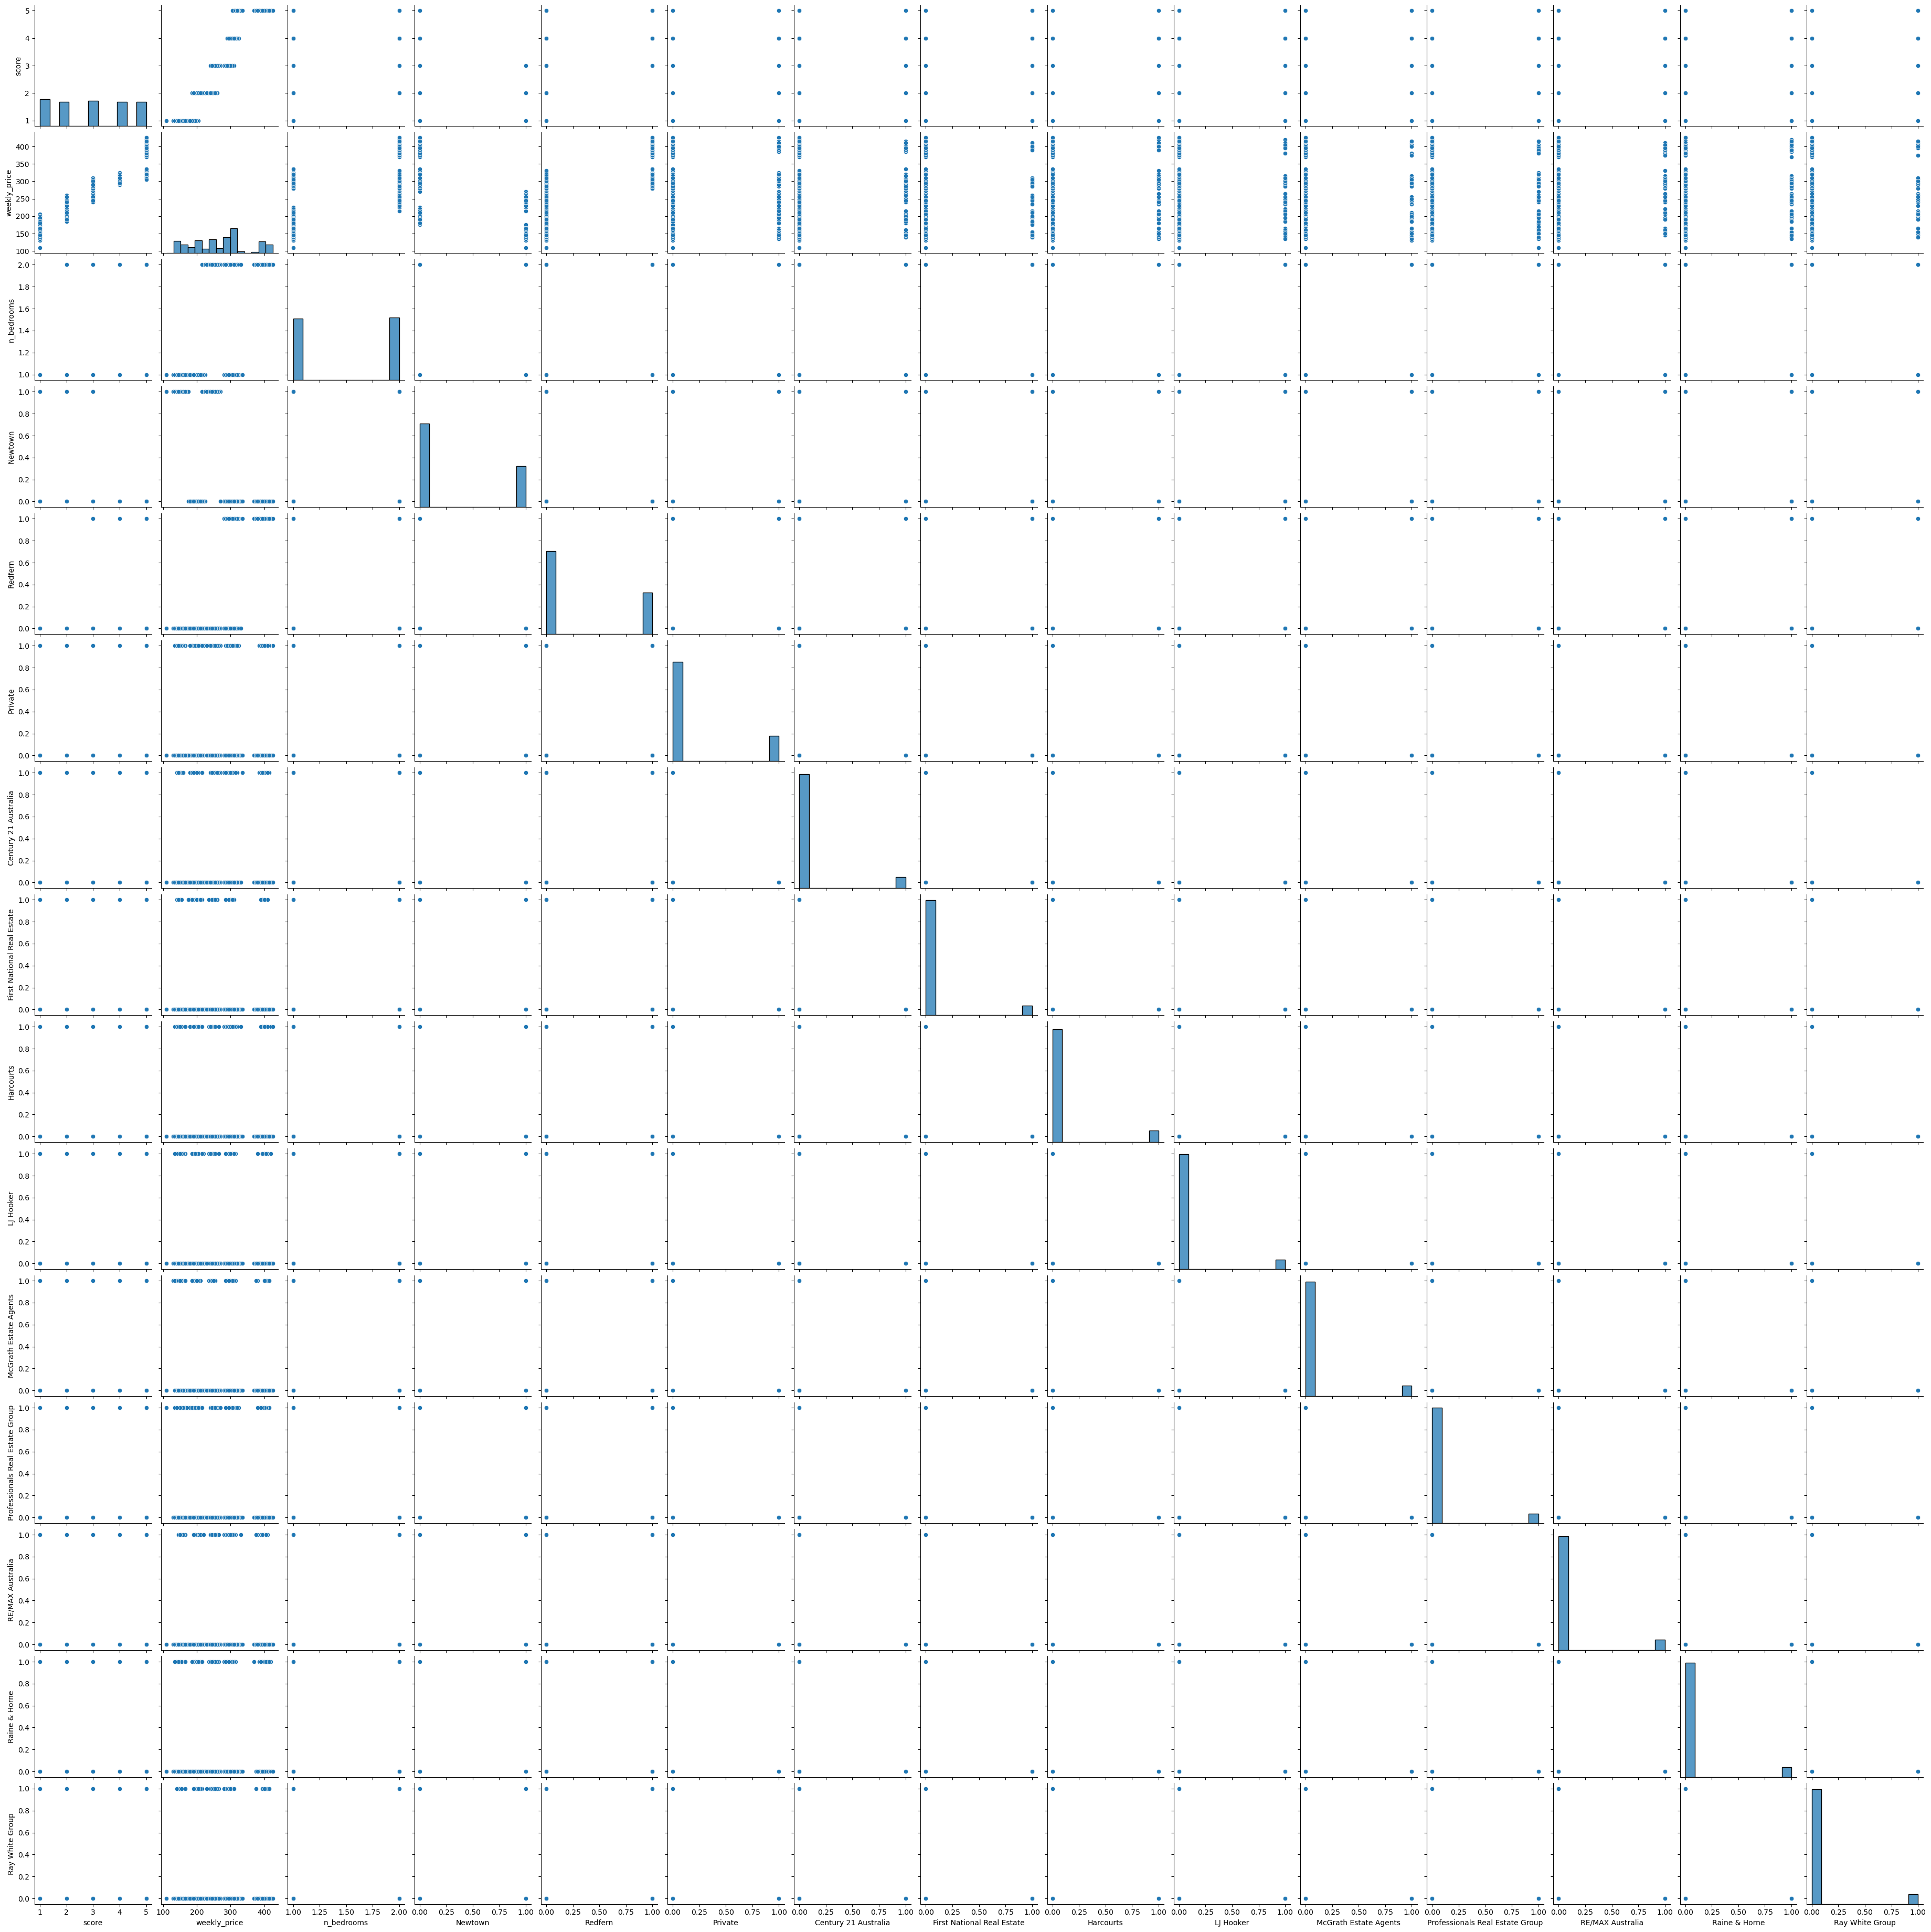

In [11]:
# Visualize relationship between scores and other features
data = df.copy()
data

data.dropna

relation = data.drop([
      'date','review_id','agency_name','property_type','suburb','review_text'
], axis=1)
sns.pairplot(relation)

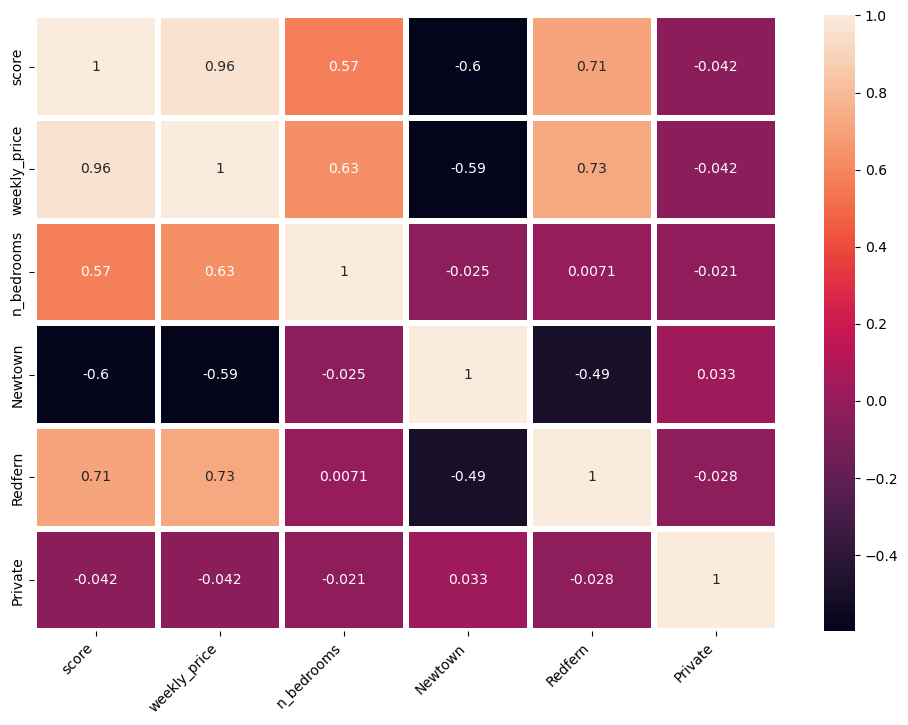

In [12]:
data = df.drop(columns=['date','review_id','agency_name','property_type','suburb','review_text','lessor',
                       'Century 21 Australia', "First National Real Estate", "Harcourts", 'LJ Hooker', 
                            'McGrath Estate Agents', 'Professionals Real Estate Group', 'RE/MAX Australia', 
                            'Raine & Horne', 'Ray White Group'])
corr_df=data.corr()
plt.figure(figsize=(12, 8))

plt.xticks(ticks=np.arange(len(corr_df.columns)) + 0.5, labels=corr_df.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(corr_df.columns)) + 0.5, labels=corr_df.columns, rotation=0)


sns.heatmap(corr_df,annot = True,linewidths=3)
xticklabels=corr_df.columns.values,
yticklabels=corr_df.columns.values
plt.savefig('correlation_heatmap.pdf', bbox_inches='tight')
plt.show() 

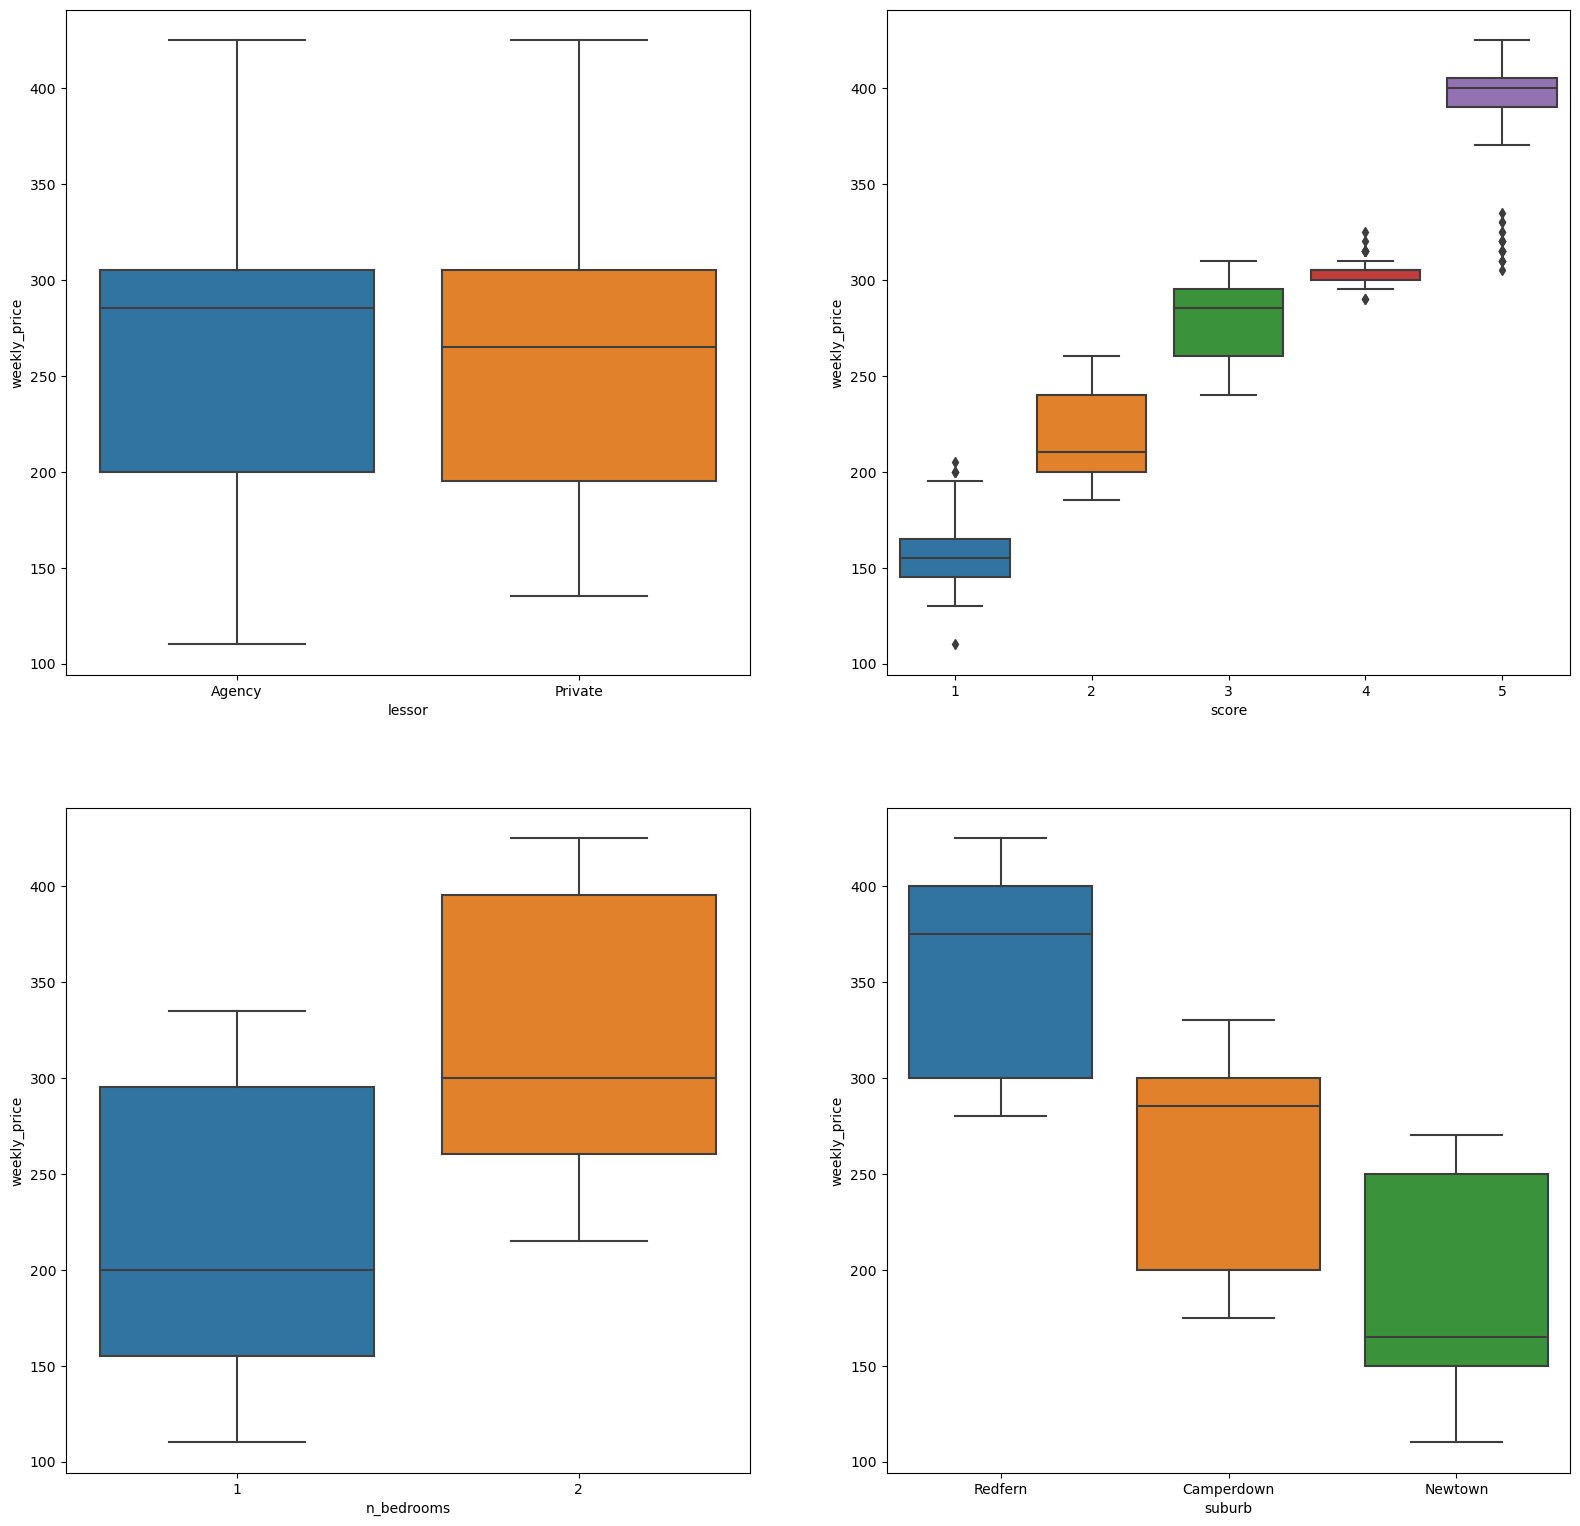

In [68]:
#https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression
plt.figure(figsize=(30, 19))
plt.subplot(2,3,1)
sns.boxplot(x = 'lessor', y = 'weekly_price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'score', y = 'weekly_price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'n_bedrooms', y = 'weekly_price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'suburb', y = 'weekly_price', data = df)

plt.savefig('appendix 1')

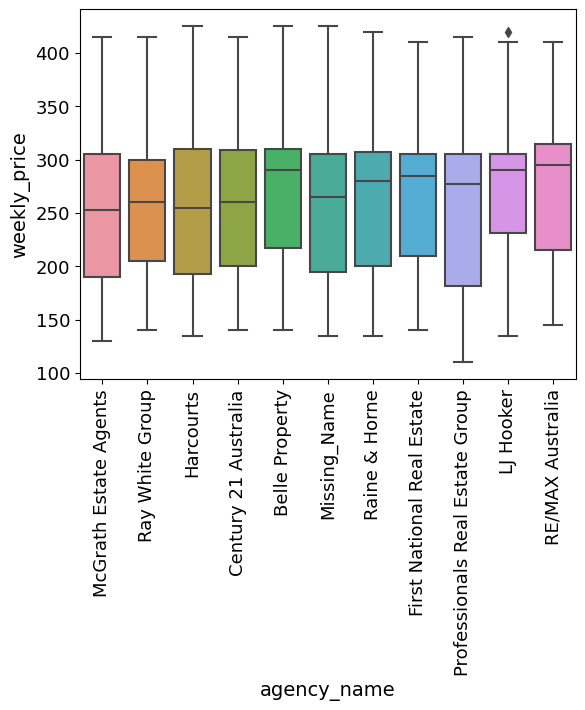

<Figure size 2000x2000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [81]:
sns.boxplot(x='agency_name', y='weekly_price', data=df)
plt.xticks(rotation=90)  
plt.figure(figsize=(20, 20))
plt.rc('axes', titlesize=14)     # Font size for the title
plt.rc('axes', labelsize=14)     # Font size for the x and y labels
plt.rc('xtick', labelsize=13)    # Font size for the x tick labels
plt.rc('ytick', labelsize=13)    # Font size for the y tick labels
plt.rc('legend', fontsize=14)    # Font size for the legend
plt.rc('font', size=13)  
plt.show()
plt.savefig('Appendix 2')


<Axes: xlabel='suburb', ylabel='score'>

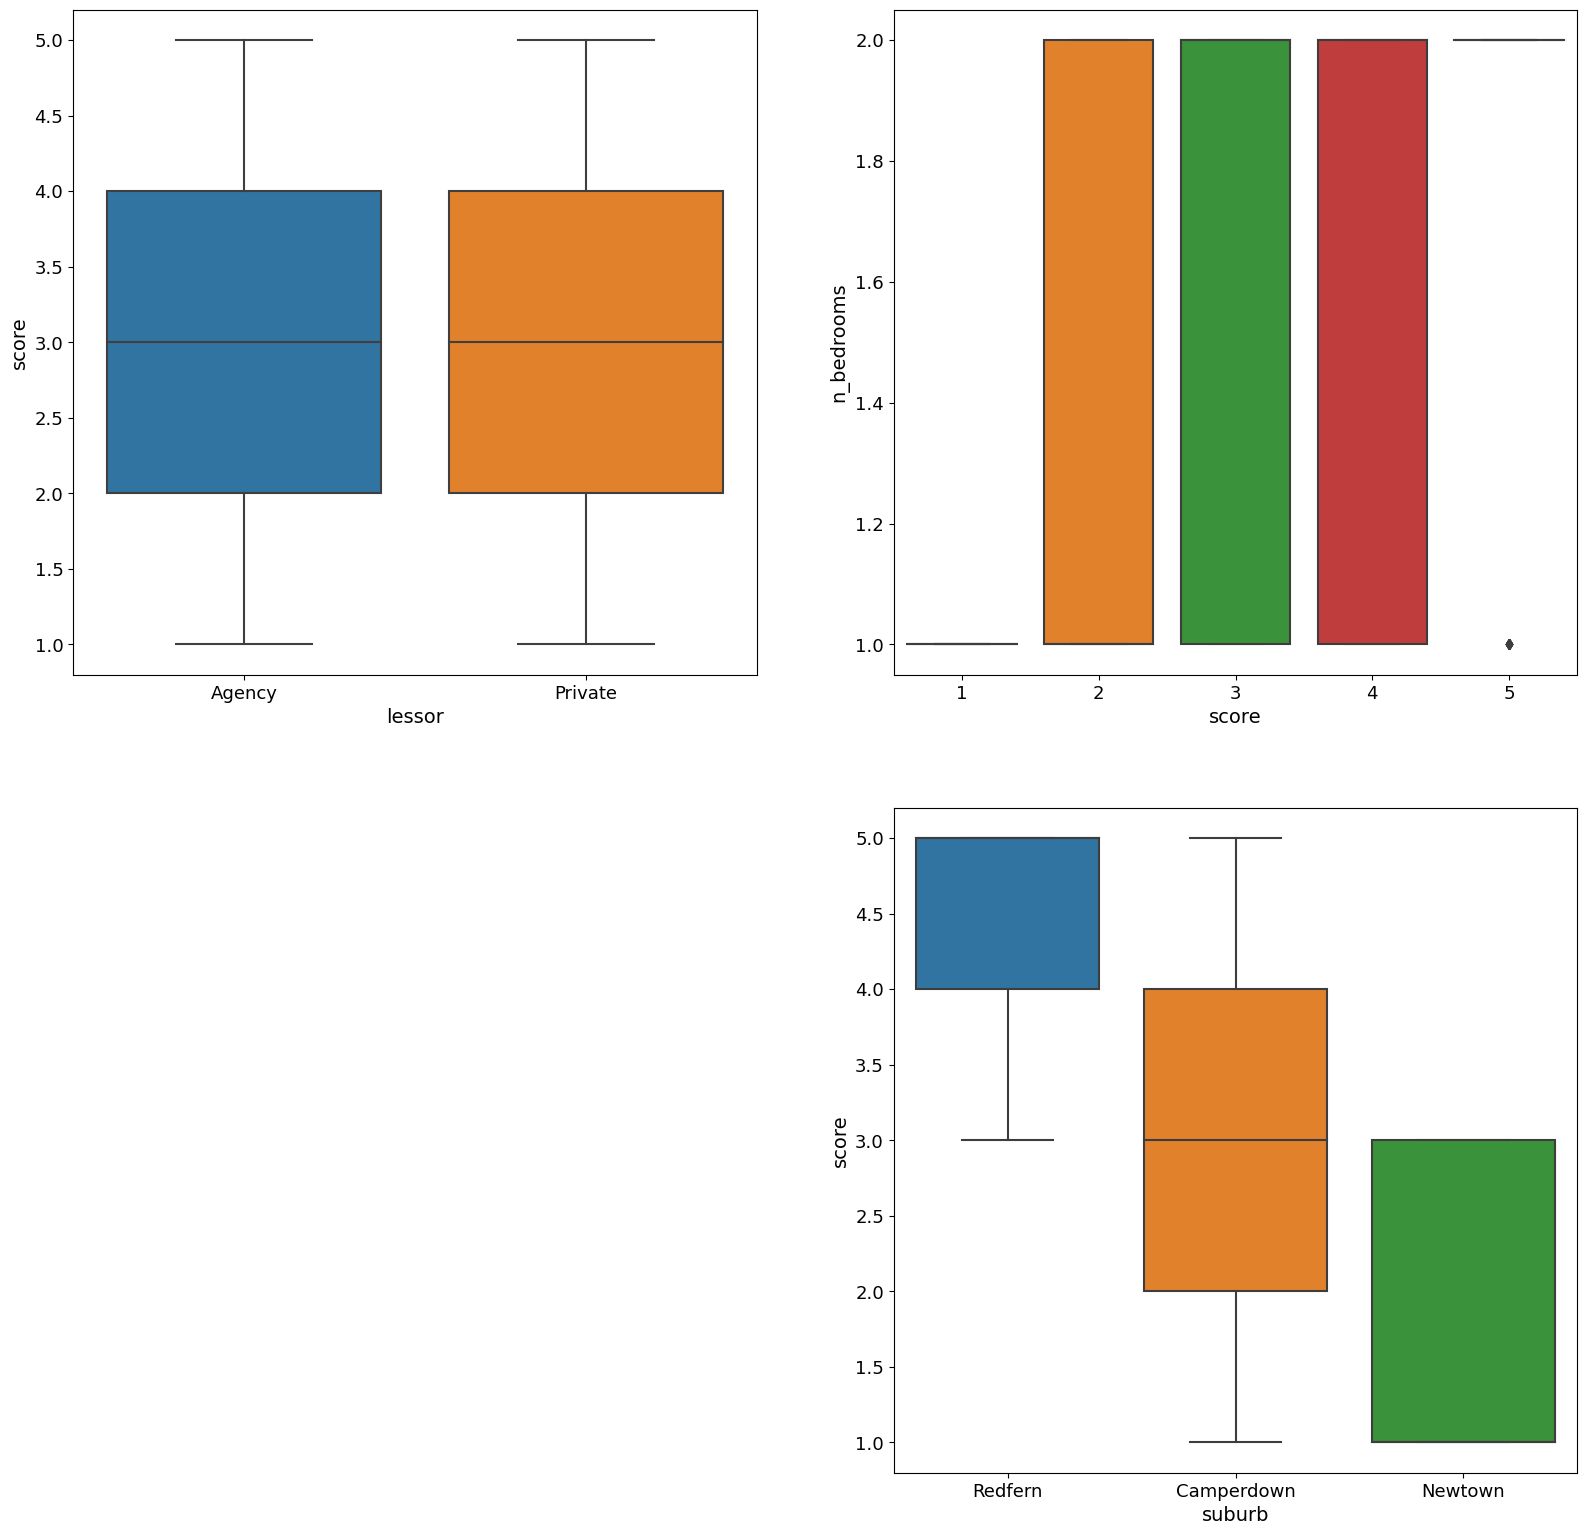

In [80]:
plt.figure(figsize=(30, 19))
plt.subplot(2,3,1)
sns.boxplot(x = 'lessor', y = 'score', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'score', y = 'n_bedrooms', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'suburb', y = 'score', data = df)

- scores have the same mean between home with Private lessor or Agencies
- homes only have 1 or 2 bedrooms
- **it seems like the average weekly rent price is higher in Redfern and lower in Newtown.**

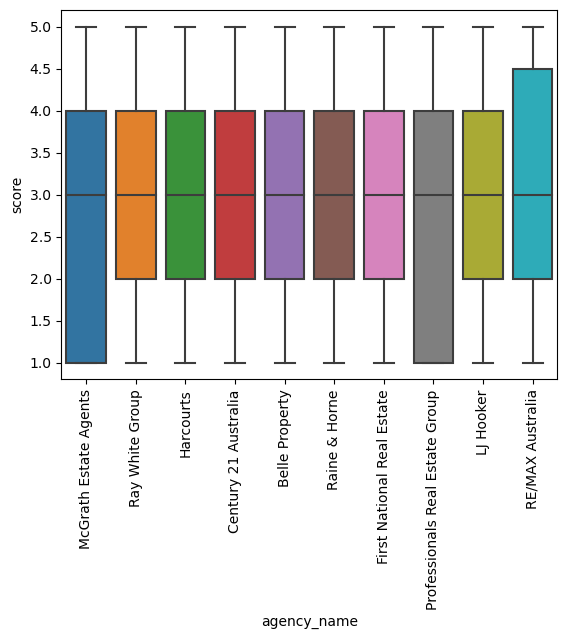

In [16]:
sns.boxplot(x='agency_name', y='score', data=df)
plt.xticks(rotation=90)  
plt.show()

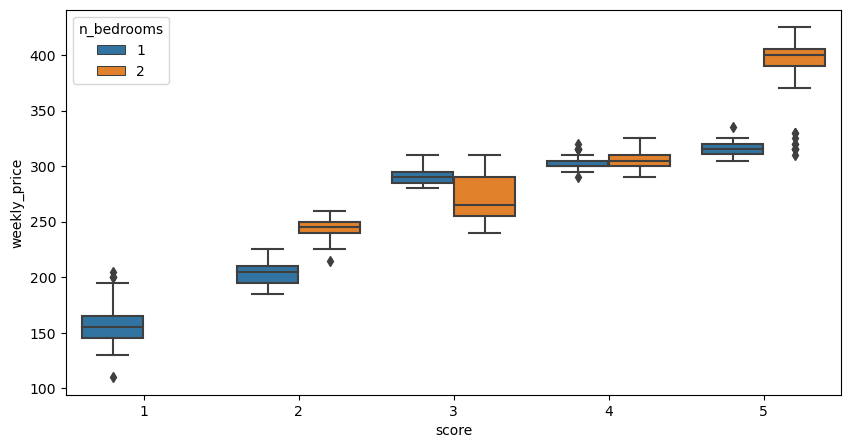

In [17]:
#https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'score', y = 'weekly_price', hue = 'n_bedrooms', data = df)
plt.show()

# FEATURE ENGINERING: 
# 1. Convert Categorical variables into Dummy variables

Convert categorical variables into numeric values, by using dummy variables. Make sure to make them independent by droping one of the dummies, to avoid Multicollinearity.


# Check for multicolinearity between features

<Axes: xlabel='suburb', ylabel='weekly_price'>

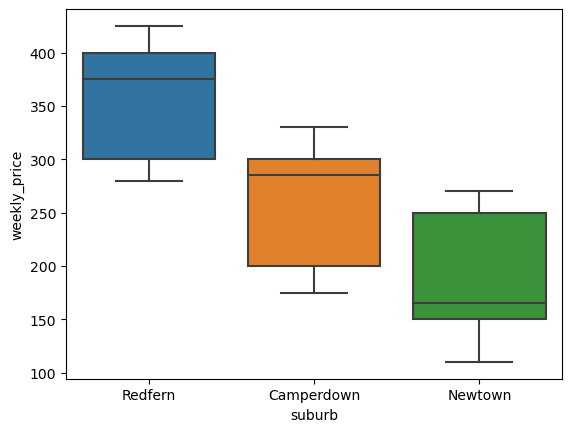

In [18]:
sns.boxplot(x = 'suburb', y = 'weekly_price', data = df)

Weekly_price and suburb seems to have a relationship, we can observe a difference in rental price across suburbs. And the the average price is higher or lower depending on the suburb.


# 2. MODELLING

# 2. 1. Model Selection

# Check for Multicolinearity

In [22]:
#https://medium.com/@TheDataScience-ProF/point-biserial-correlation-32440e373718
from scipy.stats import pointbiserialr


correlation_newtown, p_value_n = pointbiserialr(df['Newtown'], df['weekly_price'])

print("Point biserial correlation coefficient:", correlation_newtown)
print("p-value:", p_value_n)


Point biserial correlation coefficient: -0.5898531581362725
p-value: 9.217399287803011e-95


In [23]:
correlation_redfern, p_value_r = pointbiserialr(df['Redfern'], df['weekly_price'])

print("Point biserial correlation coefficient:", correlation_redfern)
print("p-value:", p_value_r)

Point biserial correlation coefficient: 0.7293609877436207
p-value: 1.0155348329865735e-166


# Add the sentiment analysis for review_text

In [24]:
#https://textblob.readthedocs.io/en/dev/
#https://github.com/explosion/spaCy/discussions/12401
#https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

from textblob import TextBlob
for index, row in df.iterrows():
    text = TextBlob(row['review_text'])
    if text.sentiment.polarity > 0:
        df.at[index, 'opinion'] = 1  #positive
    else:
        df.at[index, 'opinion'] = 0  #negative
df.head()

,review_id,date,score,lessor,agency_name,property_type,weekly_price,n_bedrooms,suburb,review_text,...,Century 21 Australia,First National Real Estate,Harcourts,LJ Hooker,McGrath Estate Agents,Professionals Real Estate Group,RE/MAX Australia,Raine & Horne,Ray White Group,opinion
0,1,2023-11-24 04:08:00,5,Agency,McGrath Estate Agents,Flat/Unit,400,2,Redfern,Living in this apartment was quite the ordeal....,...,0,0,0,0,1,0,0,0,0,1.0
1,2,2023-08-02 13:33:00,4,Agency,Ray White Group,Flat/Unit,300,2,Camperdown,Lease violations were a significant issue in t...,...,0,0,0,0,0,0,0,0,1,1.0
2,3,2023-08-03 02:08:00,3,Agency,Harcourts,Flat/Unit,290,2,Camperdown,Communication with the landlord was a nightmar...,...,0,0,1,0,0,0,0,0,0,1.0
3,4,2023-01-13 11:21:00,5,Agency,Harcourts,Flat/Unit,395,2,Redfern,"The property condition was disappointing, to s...",...,0,0,1,0,0,0,0,0,0,0.0
4,5,2023-12-30 11:07:00,5,Agency,Century 21 Australia,Flat/Unit,395,2,Redfern,Pest problems and lease violations plagued my ...,...,1,0,0,0,0,0,0,0,0,0.0


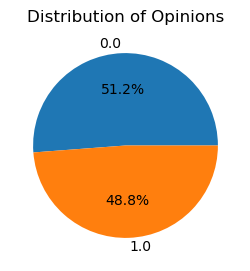

In [25]:
opinion_counts = df['opinion'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(opinion_counts, labels=opinion_counts.index, autopct='%1.1f%%')

plt.title('Distribution of Opinions')
plt.show()

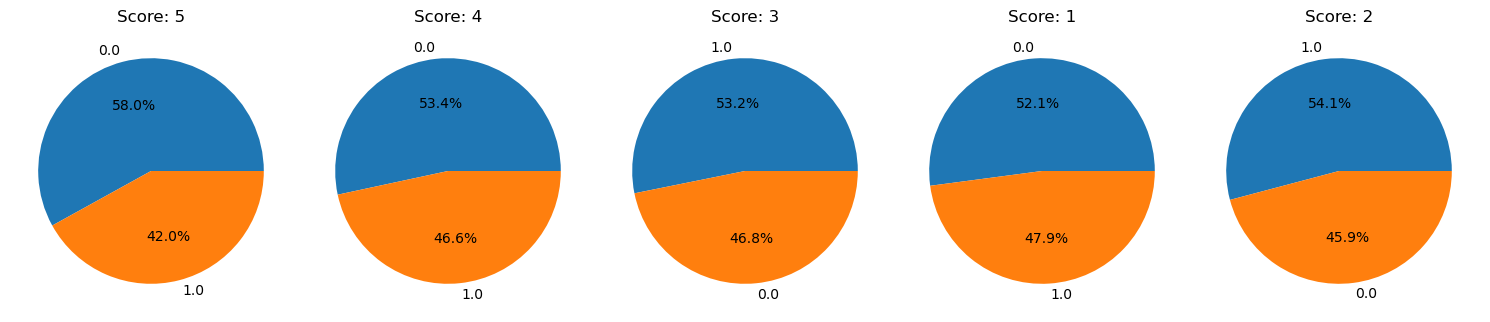

In [26]:
scores = df['score'].unique()

fig, axes = plt.subplots(1, len(scores), figsize=(15, 5))
for ax, score in zip(axes, scores):
    score_data = df[df['score'] == score]
    opinion_counts = score_data['opinion'].value_counts()
    ax.pie(opinion_counts, labels=opinion_counts.index, autopct='%1.1f%%')
    ax.set_title(f'Score: {score}')

plt.tight_layout()
plt.show()

In [27]:
df.fillna('Missing_Name', inplace=True)
#df

In [28]:
#df.isnull().sum()

In [29]:
y = df['score']
X = df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb'])
X

,weekly_price,n_bedrooms,Newtown,Redfern,Private,Century 21 Australia,First National Real Estate,Harcourts,LJ Hooker,McGrath Estate Agents,Professionals Real Estate Group,RE/MAX Australia,Raine & Horne,Ray White Group,opinion
0,400,2,0,1,0,0,0,0,0,1,0,0,0,0,1.0
1,300,2,0,0,0,0,0,0,0,0,0,0,0,1,1.0
2,290,2,0,0,0,0,0,1,0,0,0,0,0,0,1.0
3,395,2,0,1,0,0,0,1,0,0,0,0,0,0,0.0
4,395,2,0,1,0,1,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,415,2,0,1,0,0,0,0,0,0,0,0,1,0,0.0
996,310,2,0,0,0,0,0,0,1,0,0,0,0,0,0.0
997,230,2,1,0,1,0,0,0,0,0,0,0,0,0,0.0
998,240,2,1,0,0,0,0,0,1,0,0,0,0,0,0.0


# Train-vali-test split, divide data in to training and test sets

In [30]:
seed = np.random.seed(1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = seed)

# Fit ordinal logitic regression model with every variables¶


# All variables 

In [31]:
#drop the suburb variable and other variables that are not converted to int yet
#drop property_type as there is only one
#drop agency_name 
y_train= df['score']
X_train = df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb'])
X_train
model = OrderedModel(y_train, X_train, distr='logit')
result_all = model.fit(method='bfgs')

print(result_all.summary())
#LaTex
print(result_all.summary().tables[1].as_latex_tabular())

Optimization terminated successfully.
         Current function value: 0.264068
         Iterations: 130
         Function evaluations: 139
         Gradient evaluations: 139
                             OrderedModel Results                             
Dep. Variable:                  score   Log-Likelihood:                -264.07
Model:                   OrderedModel   AIC:                             566.1
Method:            Maximum Likelihood   BIC:                             659.4
Date:                Mon, 27 May 2024                                         
Time:                        13:48:43                                         
No. Observations:                1000                                         
Df Residuals:                     981                                         
Df Model:                          15                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------

# Summary Table of all model backward selection

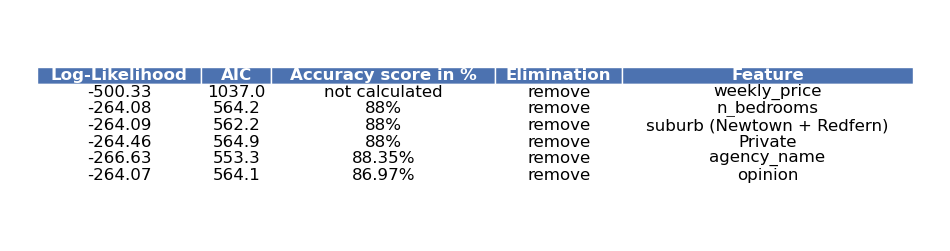

<Figure size 640x480 with 0 Axes>

In [32]:
#https://towardsdatascience.com/simple-little-tables-with-matplotlib-9780ef5d0bc4

data = {
    'Log-Likelihood': [-500.33, -264.08, -264.09, -264.46, -266.63, -264.07],
    'AIC': [1037, 564.2, 562.2, 564.9, 553.3, 564.1],
    'Accuracy score in %': ['not calculated', '88%', '88%', '88%', '88.35%', '86.97%'],
    'Elimination': ['remove', 'remove', 'remove', 'remove', 'remove', 'remove'],
    'Feature': ['weekly_price', 'n_bedrooms', 'suburb (Newtown + Redfern)', 'Private', 'agency_name', 'opinion']
}

tab = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(12, 3)) 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=tab.values, colLabels=tab.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(tab.columns))))

header = table[0, 0]
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4C72B0')
    cell.set_edgecolor('white')

plt.show()
plt.savefig("table")


In [33]:
predicted_all_var = result_all.model.predict(result_all.params, exog=X_test)
predicted_all_var

array([[1.10840515e-23, 6.75917150e-13, 8.26853555e-02, 8.95063491e-01,
        2.22511538e-02],
       [3.80992711e-25, 2.32333374e-14, 3.08876519e-03, 5.98568856e-01,
        3.98342379e-01],
       [9.87909110e-24, 6.02437396e-13, 7.43649862e-02, 9.00737441e-01,
        2.48975724e-02],
       ...,
       [9.37972146e-24, 5.71985308e-13, 7.08723849e-02, 9.02939227e-01,
        2.61883879e-02],
       [2.55516531e-44, 1.55816676e-33, 2.07792917e-22, 1.01088895e-19,
        1.00000000e+00],
       [8.75879233e-13, 5.07038438e-02, 9.49296156e-01, 1.40104595e-10,
        2.87991853e-13]])

In [34]:
#print(y_test)

In [35]:
#X_test

# Confusion Matrix


Visualizing Class Imbalance with a Confusion Matrix

Diagonal Dominance: If the confusion matrix shows a heavy diagonal dominance for certain classes and sparse off-diagonal values, it might indicate that those classes are overrepresented.

Sparse Rows/Columns: Rows or columns with lower values indicate underrepresented classes.

Class Distribution: By summing the rows (actual) or columns (predicted), you can directly see the distribution of instances across different classes.

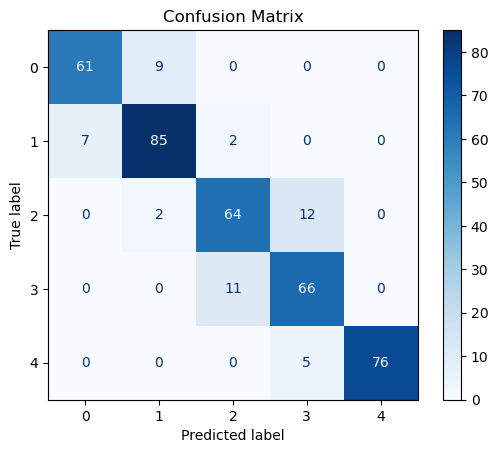

In [36]:
#https://datascience.stackexchange.com/questions/74799/axiserror-axis-1-is-out-of-bounds-for-array-of-dimension-1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_train = pd.Categorical(y_train)
y_train.codes  

predicted_scores = predicted_all_var.argmax(axis=1) + 1 

#confusion matrix
cm = confusion_matrix(y_test, predicted_scores)
#plot cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Drop agency_name

In [37]:
# without agency names
y_train2 = df['score']
X_train2 = df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb',
                            'Century 21 Australia', "First National Real Estate", "Harcourts", 'LJ Hooker', 
                            'McGrath Estate Agents', 'Professionals Real Estate Group', 'RE/MAX Australia', 
                            'Raine & Horne', 'Ray White Group'])
X_train2

model = OrderedModel(y_train2, X_train2, distr='logit')
result_agency = model.fit(method='bfgs')
print(result_agency.summary())

Optimization terminated successfully.
         Current function value: 0.266630
         Iterations: 73
         Function evaluations: 80
         Gradient evaluations: 80
                             OrderedModel Results                             
Dep. Variable:                  score   Log-Likelihood:                -266.63
Model:                   OrderedModel   AIC:                             553.3
Method:            Maximum Likelihood   BIC:                             602.3
Date:                Mon, 27 May 2024                                         
Time:                        13:48:44                                         
No. Observations:                1000                                         
Df Residuals:                     990                                         
Df Model:                           6                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

In [38]:
#X_train2

In [39]:
X_test2 = X_test[X_train2.columns]
#X_test2

In [40]:
#y_test

In [41]:
predicted_agency = result_agency.model.predict(result_agency.params, exog=df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb','Century 21 Australia', "First National Real Estate", "Harcourts", 'LJ Hooker', 'McGrath Estate Agents', 'Professionals Real Estate Group', 'RE/MAX Australia', 'Raine & Horne', 'Ray White Group']))
predicted_agency

array([[1.37770258e-49, 1.59431238e-38, 3.93592305e-25, 2.00170178e-22,
        1.00000000e+00],
       [1.20244359e-25, 1.39149823e-14, 2.55688226e-01, 7.38631565e-01,
        5.68020954e-03],
       [2.51493905e-24, 2.91035127e-13, 8.77823270e-01, 1.21903671e-01,
        2.73059265e-04],
       ...,
       [5.26719314e-09, 9.98362082e-01, 1.63791322e-03, 0.00000000e+00,
        0.00000000e+00],
       [1.91458877e-10, 9.56814848e-01, 4.31851521e-02, 1.77635684e-15,
        0.00000000e+00],
       [4.18643287e-11, 8.28903248e-01, 1.71096752e-01, 8.43769499e-15,
        0.00000000e+00]])

In [42]:
predicted_agency_var = result_agency.model.predict(result_agency.params, exog=X_test2)
predicted_agency_var

array([[2.62925881e-26, 3.04264499e-15, 6.98666141e-02, 9.04672762e-01,
        2.54606238e-02],
       [9.52685920e-28, 1.10247232e-16, 2.71431632e-03, 5.78333133e-01,
        4.18952550e-01],
       [2.62925881e-26, 3.04264499e-15, 6.98666141e-02, 9.04672762e-01,
        2.54606238e-02],
       ...,
       [2.57436311e-26, 2.97911830e-15, 6.85078193e-02, 9.05502745e-01,
        2.59894357e-02],
       [1.40261718e-49, 1.62314418e-38, 4.00710093e-25, 2.03790089e-22,
        1.00000000e+00],
       [4.37673250e-13, 4.82070370e-02, 9.51792963e-01, 7.98250355e-13,
        1.55431223e-15]])

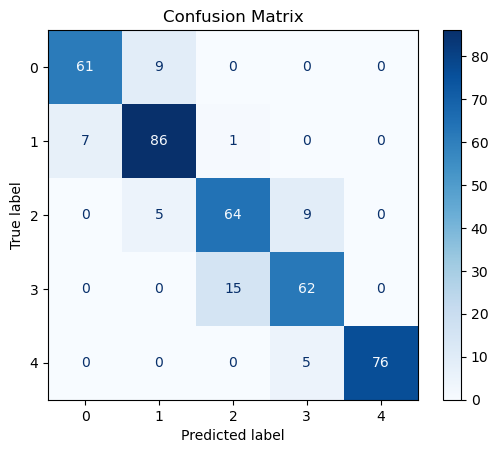

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_train2= pd.Categorical(y_train2)
y_train2.codes  
#Convert the predicted scores to the same categories as the actual scores
predicted_scores2 = predicted_agency_var.argmax(axis=1) + 1  # Assuming the scores start from 1

#confusion matrix
cm = confusion_matrix(y_test, predicted_scores2)

#Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Drop Lessor

In [44]:
#droping lessor ('Private')
y_train3 = df['score']
X_train3 = df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb','Private'])
X_train3
model = OrderedModel(y_train3, X_train3, distr='logit')
result_lessor = model.fit(method='bfgs')

#Model summary
print(result_lessor.summary())

Optimization terminated successfully.
         Current function value: 0.264464
         Iterations: 114
         Function evaluations: 123
         Gradient evaluations: 123
                             OrderedModel Results                             
Dep. Variable:                  score   Log-Likelihood:                -264.46
Model:                   OrderedModel   AIC:                             564.9
Method:            Maximum Likelihood   BIC:                             653.3
Date:                Mon, 27 May 2024                                         
Time:                        13:48:46                                         
No. Observations:                1000                                         
Df Residuals:                     982                                         
Df Model:                          14                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------

In [45]:
predicted_lessor = result_lessor.model.predict(result_lessor.params, exog= df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb','Private']))
predicted_lessor

array([[8.22228926e-49, 7.62896720e-36, 1.01611760e-24, 4.92393953e-22,
        1.00000000e+00],
       [1.34715257e-25, 1.24994177e-12, 1.42721652e-01, 8.45059544e-01,
        1.22188043e-02],
       [7.26787085e-24, 6.74341981e-11, 8.99816639e-01, 9.99541274e-02,
        2.29233441e-04],
       ...,
       [5.91821957e-11, 9.98182201e-01, 1.81779854e-03, 1.37667655e-14,
        0.00000000e+00],
       [3.39346560e-12, 9.69217437e-01, 3.07825626e-02, 2.38031816e-13,
        4.44089210e-16],
       [5.90349452e-13, 8.45619384e-01, 1.54380616e-01, 1.36779477e-12,
        2.88657986e-15]])

In [46]:
#X_train3

In [47]:
X_test3 = X_test[X_train3.columns]
#X_test3

In [48]:
predicted_lessor_var = result_lessor.model.predict(result_lessor.params, exog=X_test3)
predicted_lessor_var

array([[7.22801465e-26, 6.70643965e-13, 8.19998397e-02, 8.95464685e-01,
        2.25354753e-02],
       [2.54476189e-27, 2.36113135e-14, 3.13497968e-03, 6.01151732e-01,
        3.95713288e-01],
       [6.45233171e-26, 5.98673014e-13, 7.38498014e-02, 9.00973773e-01,
        2.51764260e-02],
       ...,
       [5.41839950e-26, 5.02740670e-13, 6.27586625e-02, 9.07404119e-01,
        2.98372181e-02],
       [1.10384996e-48, 1.02419592e-35, 1.36414730e-24, 6.61043450e-22,
        1.00000000e+00],
       [5.77026064e-15, 5.08180391e-02, 9.49181961e-01, 1.39945167e-10,
        2.88880031e-13]])

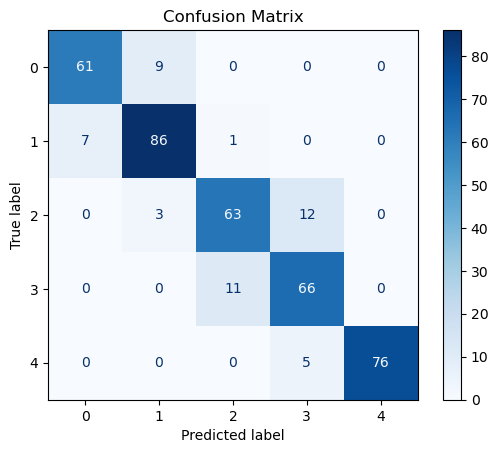

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_train3= pd.Categorical(y_train3)
y_train3.codes  
predicted_scores3 = predicted_lessor_var.argmax(axis=1) + 1 

cm = confusion_matrix(y_test, predicted_scores3)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Drop opinion

In [50]:
#droping opinion
y_train4= df['score']
X_train4 = df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb','opinion'])
X_train4
model = OrderedModel(y_train4, X_train4, distr='logit')
result_opinion = model.fit(method='bfgs')
print(result_opinion.summary())

Optimization terminated successfully.
         Current function value: 0.264069
         Iterations: 136
         Function evaluations: 146
         Gradient evaluations: 146
                             OrderedModel Results                             
Dep. Variable:                  score   Log-Likelihood:                -264.07
Model:                   OrderedModel   AIC:                             564.1
Method:            Maximum Likelihood   BIC:                             652.5
Date:                Mon, 27 May 2024                                         
Time:                        13:48:49                                         
No. Observations:                1000                                         
Df Residuals:                     982                                         
Df Model:                          14                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------

In [51]:
predicted_opinion = result_opinion.model.predict(result_opinion.params, exog=df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb','opinion']))
predicted_opinion

array([[1.79622611e-45, 8.44955665e-34, 4.81887244e-23, 2.34543493e-20,
        1.00000000e+00],
       [6.28560729e-24, 2.95678782e-12, 1.44296267e-01, 8.43690767e-01,
        1.20129659e-02],
       [3.42045662e-22, 1.60900356e-10, 9.01732642e-01, 9.80439671e-02,
        2.23390719e-04],
       ...,
       [1.33025323e-09, 9.98404490e-01, 1.59550910e-03, 2.79776202e-14,
        0.00000000e+00],
       [6.70550510e-11, 9.69271523e-01, 3.07284772e-02, 5.54667423e-13,
        1.11022302e-15],
       [1.16714874e-11, 8.45924831e-01, 1.54075169e-01, 3.18722826e-12,
        6.43929354e-15]])

In [52]:
predicted_opinion_var = result_opinion.model.predict(result_opinion.params, exog=X_test3)
predicted_opinion_var

array([[1.63328664e-24, 7.68307951e-13, 4.19780532e-02, 9.13320365e-01,
        4.47015816e-02],
       [1.35585225e-25, 6.37801130e-14, 3.62426492e-03, 6.35892109e-01,
        3.60483626e-01],
       [2.22693292e-24, 1.04756276e-12, 5.63755443e-02, 9.10443839e-01,
        3.31806168e-02],
       ...,
       [1.05863472e-24, 4.97988196e-13, 2.76164691e-02, 9.05050711e-01,
        6.73328200e-02],
       [2.11185868e-45, 9.93431141e-34, 5.66564394e-23, 2.75757439e-20,
        1.00000000e+00],
       [1.30247330e-13, 5.77319482e-02, 9.42268052e-01, 2.85597990e-10,
        5.86863891e-13]])

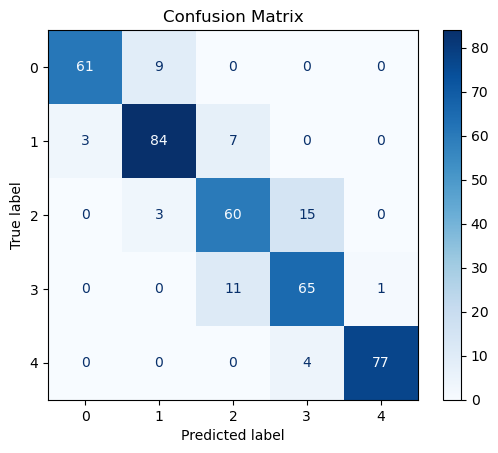

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_train4= pd.Categorical(y_train4)
y_train4.codes  
predicted_scores4 = predicted_opinion_var.argmax(axis=1) + 1 
cm = confusion_matrix(y_test, predicted_scores4)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Drop suburb

Optimization terminated successfully.
         Current function value: 0.264093
         Iterations: 117
         Function evaluations: 125
         Gradient evaluations: 125
                             OrderedModel Results                             
Dep. Variable:                  score   Log-Likelihood:                -264.09
Model:                   OrderedModel   AIC:                             562.2
Method:            Maximum Likelihood   BIC:                             645.6
Date:                Mon, 27 May 2024                                         
Time:                        13:48:51                                         
No. Observations:                1000                                         
Df Residuals:                     983                                         
Df Model:                          13                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------

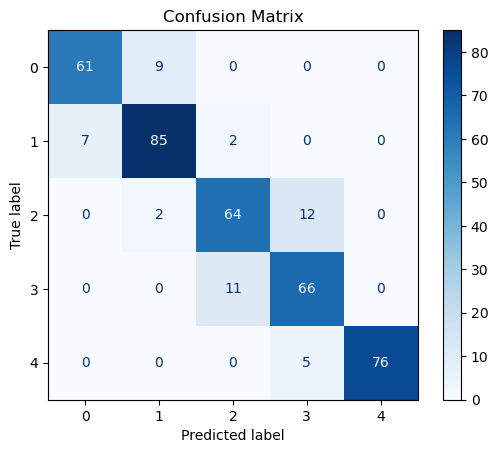

In [54]:
y_train5= df['score']
X_train5 = df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb','Newtown','Redfern'])
X_train5
model = OrderedModel(y_train5, X_train5, distr='logit')
result_suburb = model.fit(method='bfgs')

print(result_suburb.summary())
X_test5 = X_test[X_train5.columns]


predicted_suburb_var = result_suburb.model.predict(result_suburb.params, exog=X_test5)
predicted_suburb_var


y_train5= pd.Categorical(y_train5)
y_train5.codes  
predicted_scores5 = predicted_suburb_var.argmax(axis=1) + 1  

cm = confusion_matrix(y_test, predicted_scores5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Drop suburb and Agency name

In [55]:
y_train6= df['score']
X_train6 = df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb','Newtown','Redfern'
                           ,'Century 21 Australia', "First National Real Estate", "Harcourts", 'LJ Hooker', 
                            'McGrath Estate Agents', 'Professionals Real Estate Group', 'RE/MAX Australia', 
                            'Raine & Horne', 'Ray White Group'])
X_train6
model = OrderedModel(y_train6, X_train6, distr='logit')
result_suburb_agency = model.fit(method='bfgs')
print(result_suburb_agency.summary())

Optimization terminated successfully.
         Current function value: 0.266653
         Iterations: 57
         Function evaluations: 67
         Gradient evaluations: 67
                             OrderedModel Results                             
Dep. Variable:                  score   Log-Likelihood:                -266.65
Model:                   OrderedModel   AIC:                             549.3
Method:            Maximum Likelihood   BIC:                             588.6
Date:                Mon, 27 May 2024                                         
Time:                        13:48:52                                         
No. Observations:                1000                                         
Df Residuals:                     992                                         
Df Model:                           4                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

In [56]:
X_test6 = X_test[X_train6.columns]

In [57]:
predicted_s_a = result_suburb_agency.model.predict(result_suburb_agency.params, exog=df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb','Newtown','Redfern'
                                                                                                     ,'Century 21 Australia', "First National Real Estate", "Harcourts", 'LJ Hooker', 
                            'McGrath Estate Agents', 'Professionals Real Estate Group', 'RE/MAX Australia', 
                            'Raine & Horne', 'Ray White Group']))
predicted_s_a

array([[3.86094645e-28, 1.55578967e-20, 2.08341548e-14, 1.06379788e-11,
        1.00000000e+00],
       [6.36170914e-15, 2.56348513e-07, 2.55556705e-01, 7.38781359e-01,
        5.66167983e-03],
       [1.33432558e-13, 5.37670963e-06, 8.78046301e-01, 1.21676926e-01,
        2.71397126e-04],
       ...,
       [1.52137931e-05, 9.98356274e-01, 1.62851070e-03, 1.21569244e-09,
        2.38098430e-12],
       [5.51437225e-07, 9.56934017e-01, 4.30653983e-02, 3.35406529e-08,
        6.56883437e-11],
       [1.20407147e-07, 8.29114424e-01, 1.70885301e-01, 1.53608575e-07,
        3.00838021e-10]])

In [58]:
predicted_s_a_var = result_suburb_agency.model.predict(result_suburb_agency.params, exog=X_test6)
predicted_s_a_var

array([[1.38908815e-15, 5.59740703e-08, 6.97301817e-02, 9.04855633e-01,
        2.54141297e-02],
       [5.01929797e-17, 2.02255380e-09, 2.70116055e-03, 5.78128385e-01,
        4.19170453e-01],
       [1.38908815e-15, 5.59740703e-08, 6.97301817e-02, 9.04855633e-01,
        2.54141297e-02],
       ...,
       [1.36017967e-15, 5.48091872e-08, 6.83782466e-02, 9.05681443e-01,
        2.59402558e-02],
       [3.93086628e-28, 1.58396425e-20, 2.12114511e-14, 1.08306273e-11,
        1.00000000e+00],
       [1.25348838e-09, 4.80814133e-02, 9.51903802e-01, 1.47550641e-05,
        2.88977888e-08]])

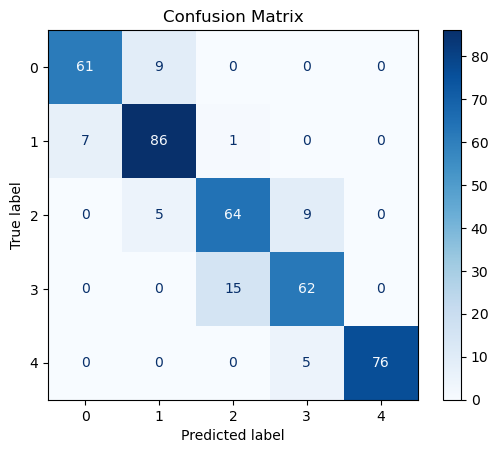

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_train6= pd.Categorical(y_train6)
y_train6.codes  
predicted_scores6 = predicted_s_a_var.argmax(axis=1) + 1  # Assuming the scores start from 1

cm = confusion_matrix(y_test, predicted_scores6)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Drop n_bedrooms (test)

In [60]:
y_train7 = df['score']
X_train7 = df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb','Private','Newtown','Redfern','n_bedrooms'
                           ,'Century 21 Australia', "First National Real Estate", "Harcourts", 'LJ Hooker', 
                            'McGrath Estate Agents', 'Professionals Real Estate Group', 'RE/MAX Australia', 
                            'Raine & Horne', 'Ray White Group'])
X_train7
model = OrderedModel(y_train7, X_train7, distr='logit')
result_bed = model.fit(method='bfgs')

print(result_bed.summary())

print(result_bed.summary().tables[1].as_latex_tabular())

Optimization terminated successfully.
         Current function value: 0.267650
         Iterations: 44
         Function evaluations: 51
         Gradient evaluations: 51
                             OrderedModel Results                             
Dep. Variable:                  score   Log-Likelihood:                -267.65
Model:                   OrderedModel   AIC:                             547.3
Method:            Maximum Likelihood   BIC:                             576.7
Date:                Mon, 27 May 2024                                         
Time:                        13:48:52                                         
No. Observations:                1000                                         
Df Residuals:                     994                                         
Df Model:                           2                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

# Drop weekly_price

In [61]:
y_train8 = df['score']
X_train8 = df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb',
                           'weekly_price'])
X_train8
model = OrderedModel(y_train8, X_train8, distr='logit')
result_price = model.fit(method='bfgs')

print(result_price.summary())


Optimization terminated successfully.
         Current function value: 0.500326
         Iterations: 233
         Function evaluations: 257
         Gradient evaluations: 257
                             OrderedModel Results                             
Dep. Variable:                  score   Log-Likelihood:                -500.33
Model:                   OrderedModel   AIC:                             1037.
Method:            Maximum Likelihood   BIC:                             1125.
Date:                Mon, 27 May 2024                                         
Time:                        13:48:55                                         
No. Observations:                1000                                         
Df Residuals:                     982                                         
Df Model:                          14                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------

# Dropping n_bedrooms

In [62]:
y_train9= df['score']
X_train9 = df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb','n_bedrooms'])
X_train9
model = OrderedModel(y_train9, X_train9, distr='logit')
result_n_bed = model.fit(method='bfgs')

print(result_n_bed.summary())

Optimization terminated successfully.
         Current function value: 0.264081
         Iterations: 148
         Function evaluations: 161
         Gradient evaluations: 161
                             OrderedModel Results                             
Dep. Variable:                  score   Log-Likelihood:                -264.08
Model:                   OrderedModel   AIC:                             564.2
Method:            Maximum Likelihood   BIC:                             652.5
Date:                Mon, 27 May 2024                                         
Time:                        13:48:59                                         
No. Observations:                1000                                         
Df Residuals:                     982                                         
Df Model:                          14                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
--------------

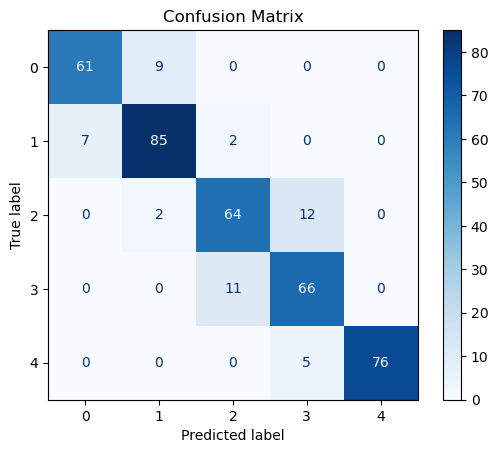

In [63]:
X_test9 = X_test[X_train9.columns]

predicted_n_bed_var = result_n_bed.model.predict(result_n_bed.params, exog=X_test9)
predicted_n_bed_var


y_train9= pd.Categorical(y_train9)
y_train9.codes  

predicted_scores9 = predicted_n_bed_var.argmax(axis=1) + 1  
cm = confusion_matrix(y_test, predicted_scores9)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Selected Model 

In [64]:
y_train10= df['score']
X_train10 = df.drop(columns=['date', "review_id",'agency_name','lessor', "property_type","score","review_text",'suburb'
                            ,'Century 21 Australia', "First National Real Estate", "Harcourts", 'LJ Hooker', 
                            'McGrath Estate Agents', 'Professionals Real Estate Group', 'RE/MAX Australia', 
                            'Raine & Horne', 'Ray White Group','n_bedrooms', 'Newtown', 'Redfern'])
X_train10
model = OrderedModel(y_train10, X_train10, distr='logit')
result_SM = model.fit(method='bfgs')

print(result_SM.summary())


Optimization terminated successfully.
         Current function value: 0.267183
         Iterations: 52
         Function evaluations: 59
         Gradient evaluations: 59
                             OrderedModel Results                             
Dep. Variable:                  score   Log-Likelihood:                -267.18
Model:                   OrderedModel   AIC:                             548.4
Method:            Maximum Likelihood   BIC:                             582.7
Date:                Mon, 27 May 2024                                         
Time:                        13:48:59                                         
No. Observations:                1000                                         
Df Residuals:                     993                                         
Df Model:                           3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

In [65]:
#LaTex
print(result_SM.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                       & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{weekly\_price} &       0.3046  &        0.022     &    13.783  &         0.000        &        0.261    &        0.348     \\
\textbf{Private}       &      -0.2750  &        0.284     &    -0.967  &         0.334        &       -0.833    &        0.283     \\
\textbf{opinion}       &       0.0430  &        0.221     &     0.195  &         0.846        &       -0.390    &        0.476     \\
\textbf{1/2}           &      58.4058  &        4.278     &    13.652  &         0.000        &       50.021    &       66.791     \\
\textbf{2/3}           &       2.8804  &        0.074     &    38.777  &         0.000        &        2.735    &        3.026     \\
\textbf{3/4}           &       2.6383  &        0.076     &    34.591  &         0.000        &        2.489    &        2.788     \\
\text

In [66]:
# Excludes the last 4 params, which are the cuts/thresholds
np.exp(result_SM.params[:-4])

weekly_price    1.356127
Private         0.759568
opinion         1.043975
dtype: float64

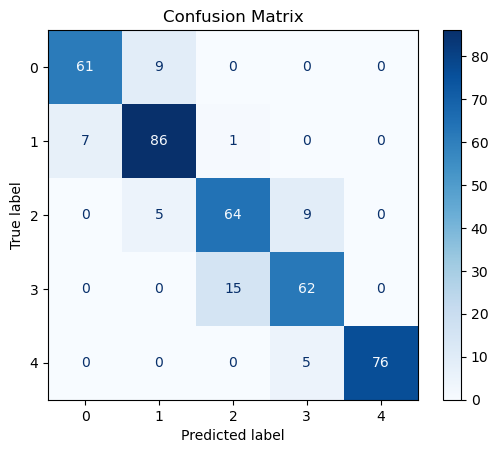

In [67]:
X_test10 = X_test[X_train10.columns]

predicted_SM = result_SM.model.predict(result_SM.params, exog=X_test10)
predicted_SM


y_train10= pd.Categorical(y_train10)
y_train10.codes  

predicted_scores10 = predicted_SM.argmax(axis=1) + 1  
cm = confusion_matrix(y_test, predicted_scores10)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()